In [ ]:
#import the required modules
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [ ]:
#read the dataset
Data=pd.read_csv('seattle-weather.csv')
print(Data.head(10))
Data.describe()

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
#split the dataset into the training set and test set
train_size=int(0.75*Data.shape[0])
test_size=int(0.25*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 1095
Testing set size : 365


In [ ]:
#get the features and the target attribute from the data set
Data=Data.sample(frac=1)
X=Data.iloc[:,[1, 2, 3, 4]].values
y=Data.iloc[:,5].values
X=X.astype(float)

In [ ]:
X_train=X[0:train_size,:]
y_train=y[0:train_size]
X_test=X[train_size:,:]
y_test=y[train_size:]
print(y_train)
print(X_train)

['sun' 'sun' 'sun' ... 'sun' 'rain' 'sun']
[[ 0.  22.2 15.   3.7]
 [ 0.  18.3  8.9  3.7]
 [ 0.  26.7 12.2  2.5]
 ...
 [ 0.  25.6 16.1  2.6]
 [18.5 11.1  7.2  3.4]
 [ 0.  17.2  7.2  5.2]]


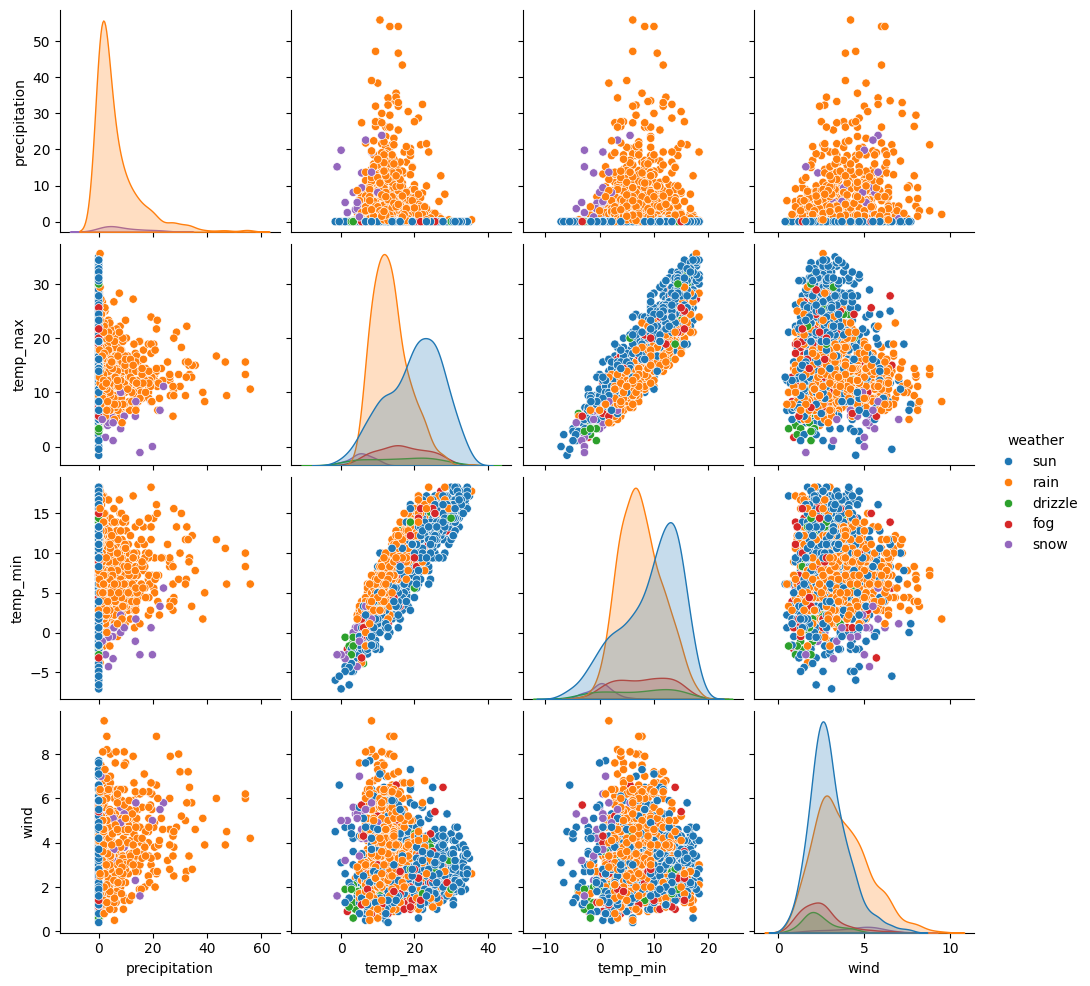

In [ ]:
#visualize the data
sns.pairplot(Data, hue="weather")

In [ ]:
#fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#evaluate the model using confusion matrix
cm2=confusion_matrix(y_test,y_pred)
print(cm2)

[[  1   0   0   0   9]
 [  0   0   0   0  26]
 [  0   0 160   3  14]
 [  0   0   6   4   0]
 [  1   0   0   0 142]]


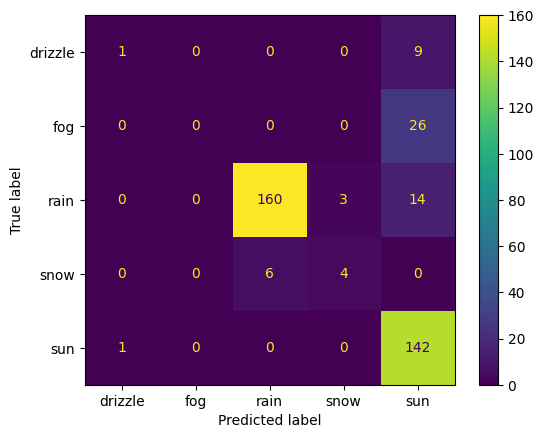

In [ ]:
labels = ["drizzle","fog","rain","snow","sun"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
disp.plot();

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8387978142076503


In [ ]:
#predict the weather for a unseen input
new_data = np.array([[25,12,5,6.5]])
prediction = classifier.predict(new_data)
print(prediction)

['rain']
